# <div style="background-color: #E59A9A; padding: 10px;"><b>Proyecto Final</b>

</div>

### <div style="background-color: #BCF5F5; padding: 10px;"><b>Parte 1. Contexto y estructura del Notebook</b>

</div>

El presente notebook expone los resultados del código utilizado para el ejercicio de predicción de "Gasto total por manzana censal en telefonía Móvil para el Grupo Socioeconómico C2". La varable target o variable a predecir es "G_TM_C2". Es una variable numérica y de tipo flotante, que refleja en pesos chilenos la estimación de la sumatoria de lo que todos los hogares o familias están dispuestos a pagar por este servicio de telefonía móvil de manera mensual. 

Como es posible leer con mayor detalle en la memoria de este trabajo, se ha comentado ya que nuestro dataset caracteriza socioeconómicamente una parte del territorio de Santiago de Chile. Características como la población, el número de hogares, la edad, la renta (ingresos en Chile), el gasto o el Grupo socioeconómico, sirven para perfilan muy bien la demanda por servicios móviles en la población. Lo anterior es un input muy importante para las campañas de marketing de las empresas de telecomunicación. Sin embargo, cada vez se necesita mas detalle y por esto la escala de manzana censal es un nivel deseado por estas compañias sobretodo en el contexto de una de las industrias mas competitivas en todo latinomérica.

Algo muy importante de añadir antes de comenzar con el código, es que el dataset presenta una serie de variables que solo serçan utilizadas para introducir el contexto del problema y que no se utilizarán en la producción del modelo de machine learning.

Dicho lo anterior, pasaremos rápidamente a describir cómo se ha organizado el proceso de producción del código.

El trabajo se ha dividido en 7 partes (incluyendo la actual de "Contexto"), donde a lo largo de él se presentará una muestra de los principales procesos, técnicas y modelos para obtener la predicción de una variable como la que ya hemos comentado. A continuación haremos un listado con las principales etapas del trabajo. 

- Parte 1. Contexto
- Parte 2. Exploración preliminar de los datos
- Parte 3. Eliminación de columnas previo al preprocesado
- Parte 4. Preprocesado
- Parte 5. Aplicación de Modelos de Regresión
- Parte 6. Graficando la predicción
- Parte 7. Visualizando la predicción en un dataframe
- Parte 8. Comentarios y conclusiones

### <div style="background-color: #BCF5F5; padding: 10px;"><b>Parte 2. Exploración preliminar de los datos.</b>
</div>

#### <div style="background-color: #DEF4F4; padding: 10px;"><b>2.1 Importación de librerias básicas para el análisis exploratorio de datos.</b>

</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import missingno as msno
warnings.filterwarnings("ignore")


from scipy import stats
from scipy.stats import shapiro
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, r2_score
from sklearn.model_selection import RandomizedSearchCV, cross_validate, cross_val_score, cross_val_predict


#### <div style="background-color: #DEF4F4; padding: 10px;"><b>2.2 Lectura del dataset.</b>

</div>

In [2]:
df = pd.read_excel("bbdd_telco.xlsx")
df.head(10)

,ID,COMUNA,PROVINCIA,REGION,HOG_ABC1,HOG_C2,HOG_C3,HOG_D,HOG_E,TOTAL_HOG,...,POB_60_MAS,PXQ,G_TM_ABC1,G_TM_C2,G_TM_C3,G_TM_D,G_TM_E,X,Y,GSE
0,6105,PUDAHUEL,SANTIAGO,METROPOLITANA,8,30,8,2,2,50,...,13,6.994429e+07,562358.037141,1.603839e+06,285584.490944,36649.890509,15792.168635,-70.745667,-33.454472,C2
1,6106,PUDAHUEL,SANTIAGO,METROPOLITANA,0,0,0,17,0,17,...,8,6.517614e+06,0.000000,0.000000e+00,0.000000,311524.069324,0.000000,-70.764269,-33.428085,D
2,6108,PUDAHUEL,SANTIAGO,METROPOLITANA,1,7,12,7,1,28,...,12,2.341305e+07,70294.754643,3.742292e+05,428376.736416,128274.616780,7896.084317,-70.738802,-33.464359,C3
3,6109,PUDAHUEL,SANTIAGO,METROPOLITANA,2,6,20,7,2,37,...,15,3.088272e+07,140589.509285,3.207679e+05,713961.227360,128274.616780,15792.168635,-70.731682,-33.464187,C3
4,6110,PUDAHUEL,SANTIAGO,METROPOLITANA,0,3,22,5,0,30,...,15,2.133228e+07,0.000000,1.603839e+05,785357.350096,91624.726272,0.000000,-70.746424,-33.462344,C3
5,6111,PUDAHUEL,SANTIAGO,METROPOLITANA,3,5,8,30,11,57,...,27,3.404379e+07,210884.263928,2.673066e+05,285584.490944,549748.357630,86856.927491,-70.733304,-33.461991,D
6,6112,PUDAHUEL,SANTIAGO,METROPOLITANA,2,3,4,19,6,34,...,11,2.077734e+07,140589.509285,1.603839e+05,142792.245472,348173.959832,47376.505904,-70.747554,-33.461199,D
7,6113,PUDAHUEL,SANTIAGO,METROPOLITANA,1,3,4,16,5,29,...,15,1.648859e+07,70294.754643,1.603839e+05,142792.245472,293199.124069,39480.421587,-70.747442,-33.458567,D
8,6114,PUDAHUEL,SANTIAGO,METROPOLITANA,0,7,10,15,2,34,...,15,2.217354e+07,0.000000,3.742292e+05,356980.613680,274874.178815,15792.168635,-70.742826,-33.460962,D
9,6115,PUDAHUEL,SANTIAGO,METROPOLITANA,3,9,3,1,1,17,...,7,2.341841e+07,210884.263928,4.811518e+05,107094.184104,18324.945254,7896.084317,-70.741792,-33.459024,C2


#### <div style="background-color: #DEF4F4; padding: 10px;"><b>2.3 Explicación de las columnas o features.</b>

</div>

A continuación se presenta un listado con la definición de cada uno de las 24 columnas del dataset importado.

   1.   **ID**.          :Identificador interno de la manzana censal a la que pertenece
   2.   **MUNICIPIO**.   :Municipio al que pertenece la manzana censal
   3.   **PROVINCIA**.   :Provincia a la que pertenece la manzana censal
   4.   **REGION**.      :Región a la que pertenece la manzana censal
   5.   **HOG_ABC1**     :Nº de hogares totales clasificados con GSE<sup id="a1">[1](#f1)</sup> ABC1
   6.   **HOG_C2**.      :Nº de hogares totales clasificados con GSE C2
   7.   **HOG_C3**.      :Nº de hogares totales clasificados con GSE C3
   8.   **HOG_D**.	   :Nº de hogares totales clasificados con GSE D
   9.   **HOG_E**.	   :Nº de hogares totales clasificacados con GSE E
   10.  **TOTAL_HOG**.   :Nº hogares totales en la manzana censal
   11.  **TOTAL_POB**.   :Nº total de personas residentes en la manzana
   12.  **POB_0_14**.    :Nº total de personas de entre 0 y hasta los 14 años
   13.  **POB_15_29**.   :Nº total de personas de entre 15 y hasta los 29 años
   14.  **POB_30_59**.   :Nº total de personas de entre 30 y hasta los 59 años
   15.  **POB_60_MAS**.  :Nº total de personas de 60 años y más
   16.  **INGRESOS**.    :Ingresos totales acumulados estimados de todos los hogares de la manzana censal. En pesos chilenos.
   17.  **G_TM_ABC1**.   :Gasto total acumulado en telefonia móvil de todos los hogares del GSE ABC1. En pesos chilenos
   18.  **G_TM_C2**.     :Gasto mensual total acumulado en telefonía móvil de todos los hogares del GSE C2. En pesos chilenos
   19.  **G_TM_C3**.     :Gasto mensual total acumulado en telefonía móvil de todos los hogares del GSE C3. En pesos chilenos
   20.  **G_TM_D**.      :Gasto mensualtotal acumulado en telefonía móvil de todos los hogares del GSE D. En pesos chilenos
   21.  **G_TM_E**.      :Gasto mensual total acumulado en telefonía móvil de todos los hogares del GSE E. En pesos chilenos
   22.  **X**.	       :Coordenada geográfica del eje Y
   23.  **Y**.           :Coordenada geográfica del eje X
   24.  **GSE**.         :GSE Predominante<sup id="a2">[2](#f2)</sup> en la manzana.
   
*Notas al pie*:
<hr>
<ol style="font-size: 11px;">
<li id="f1">El GSE es la clasificación socioeconómica propuesta por la AIM (Asociación de investgadores de mercado) de Chile para tener una orientación a nivel de mercado sobre como se comportan los distintos niveles sociales y económicos frente a hábitos de compra, ocio, educación, etc. Esta clasificación se divide de manera general en 5 niveles. Siendo el ABC1 el grupo con mayor acceso de la sociedad. Es decir, con mayores niveles de educación, ingresos y poder adquisitivo de bienes y servicios. Luego el grupo C2 sería la clase emergente. Después la clásica clase media (C3). Y finalmente las clases vulnerables como la D y la clase pobre caracterizada por la E. [<a href="#a1">↩</a>]</li>
<li id="f2">Este campo refleja el grupo socioeconómico (GSE) que más se repite en la manzana (la moda), y por tanto es el que da título a la celda. [<a href="#a2">↩</a>]</li>
</ol>

#### <div style="background-color: #DEF4F4; padding: 10px;"><b>2.4 Análisis preliminar del dataset.</b>

</div>

En las siguientes celdas observaremos si los tipos de datos coinciden con la naturaleza de ellos, además de revisar de manera general cada columna y chequear existencia de valores Nulos y Nan's.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19818 entries, 0 to 19817
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          19818 non-null  int64  
 1   COMUNA      19818 non-null  object 
 2   PROVINCIA   19818 non-null  object 
 3   REGION      19818 non-null  object 
 4   HOG_ABC1    19818 non-null  int64  
 5   HOG_C2      19818 non-null  int64  
 6   HOG_C3      19818 non-null  int64  
 7   HOG_D       19818 non-null  int64  
 8   HOG_E       19818 non-null  int64  
 9   TOTAL_HOG   19818 non-null  int64  
 10  TOTAL_POB   19818 non-null  int64  
 11  POB_0_14    19818 non-null  int64  
 12  POB_15_29   19818 non-null  int64  
 13  POB_30_59   19818 non-null  int64  
 14  POB_60_MAS  19818 non-null  int64  
 15  PXQ         19818 non-null  float64
 16  G_TM_ABC1   19818 non-null  float64
 17  G_TM_C2     19818 non-null  float64
 18  G_TM_C3     19818 non-null  float64
 19  G_TM_D      19818 non-nul

#### <div style="background-color: #DEF4F4; padding: 10px;"><b>2.5 Algunas observaciones previo a la eliminación de las primeras columnas.</b>

</div>

Como bien se ha expresado en la parte 1 del presente documento, los *features* más importantes del dataset, por una parte, son aquellos donde que sabemos influyen directamente en los patrones de consumo. Por lo tanto todo aquello que indique GSE y nivel de ingreso es fundamental. Por otra parte, la distribución etárea es otro de los atributos del dataset que expresa un patrón de consumo.

Si ahora nos enfocamos en aquellas variables que pueden no tener un impacto importante al momento de realizar el *train* de nuestro modelo, podemos indicar que 'municipio' quedaría en esta categoría. Esto porque ya que estamos analizando un nivel detalle mucho mayor que el municipio, como lo es la manzana censal, la etiqueta municipio pierde valor en el *train* al tener una escala de análisis tan detallada como la manzana. De todas maneras, por el momento mantendremos este campo para el análisis exploratorio y ya decidiremos si lo utilizaremos para el "train" de nuestro modelo".

Sin duda alguna, tenemos campos en nuestro dataset que son totalmente prescindibles, como por ejemplo, Las coordenadas geográficas X e Y ya que no necesitaremos estas referencias puesto que son centroides y nuestras manzanas censales son polígonos. Por otro lado y como excepción quitaremos el campo 'GSE' (al momento de realizar el *train*) debido a que ya tenemos la apertura de estos tanto en cantidad de hogares como en gasto. Por lo tanto es un campo que redundará información. Sin embargo para el análisis exploratorio lo dejaremos.
Por último, región y provincia no nos aportan ninguna información extra producto de que todas las manzanas se encuentran en la misma zona.

En resumen, ahora eliminaremos los siguientes campos:

1. 'PROVINCIA'
2. 'REGION'
3. 'X'
4. 'Y'

In [4]:
df.drop(["PROVINCIA","REGION","X","Y"], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19818 entries, 0 to 19817
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          19818 non-null  int64  
 1   COMUNA      19818 non-null  object 
 2   HOG_ABC1    19818 non-null  int64  
 3   HOG_C2      19818 non-null  int64  
 4   HOG_C3      19818 non-null  int64  
 5   HOG_D       19818 non-null  int64  
 6   HOG_E       19818 non-null  int64  
 7   TOTAL_HOG   19818 non-null  int64  
 8   TOTAL_POB   19818 non-null  int64  
 9   POB_0_14    19818 non-null  int64  
 10  POB_15_29   19818 non-null  int64  
 11  POB_30_59   19818 non-null  int64  
 12  POB_60_MAS  19818 non-null  int64  
 13  PXQ         19818 non-null  float64
 14  G_TM_ABC1   19818 non-null  float64
 15  G_TM_C2     19818 non-null  float64
 16  G_TM_C3     19818 non-null  float64
 17  G_TM_D      19818 non-null  float64
 18  G_TM_E      19818 non-null  float64
 19  GSE         19818 non-nul

#### <div style="background-color: #DEF4F4; padding: 10px;"><b>2.6 Transformación y edición de datos.</b>

</div>

#### <div style="background-color: #EEF4F4; padding: 10px;"><b>2.6.1 *Eliminación de algunos valores del dataset*.</b>

</div>

Sabemos que el dataset provee la información de casi 20.000 manzanas censales de la ciudad de Santiago. Sin embargo sabemos por información previa, que muchas de estas manzanas censales no poseen viviendas en su interior. Puesto que muchas de ellas tienen un uso cien por ciento comercial o corresponden a plazas públicas o a edificios de oficina cuyo uso no es la vivienda y por tanto no cuentan con población residente. Todas estas manzanas deberían tener como valor en su campo 'TOTAL_POB' un 0 (porque no existe población residente). 

Conociendo esta información lo más lógico es identificar todas estas filas con valor 0 y eliminarlas, debido a que nuestro estudio tiene una lógica residencial. De esta manera, solo nos quedaremos con manzanas residenciales o que al menos tengan una parte de ella con población residente.

In [5]:
(df["TOTAL_POB"] == 0).sum()

4046

Vemos que una parte importante de las manzanas tienen registros con valor 0. Tener registros con valor 0 en el campo 'TOTAL_POB' genera automáticamente que no exista información para clasificar en todos los campos que definen el perfil socioeconómico, ingresos, cantidad total de hogares, etc. Es decir, son registros que no aportan ninguna información al análisis predictivo que queremos realizar más adelante. 

Por tanto ahora procederemos a eliminarlos. 

In [6]:
df = df[df["TOTAL_POB"] != 0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15772 entries, 0 to 19817
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          15772 non-null  int64  
 1   COMUNA      15772 non-null  object 
 2   HOG_ABC1    15772 non-null  int64  
 3   HOG_C2      15772 non-null  int64  
 4   HOG_C3      15772 non-null  int64  
 5   HOG_D       15772 non-null  int64  
 6   HOG_E       15772 non-null  int64  
 7   TOTAL_HOG   15772 non-null  int64  
 8   TOTAL_POB   15772 non-null  int64  
 9   POB_0_14    15772 non-null  int64  
 10  POB_15_29   15772 non-null  int64  
 11  POB_30_59   15772 non-null  int64  
 12  POB_60_MAS  15772 non-null  int64  
 13  PXQ         15772 non-null  float64
 14  G_TM_ABC1   15772 non-null  float64
 15  G_TM_C2     15772 non-null  float64
 16  G_TM_C3     15772 non-null  float64
 17  G_TM_D      15772 non-null  float64
 18  G_TM_E      15772 non-null  float64
 19  GSE         15772 non-nul

Ahora podemos ver según la descripción anterior cómo nos quedamos con 15.772 registros o manzanas censales.

#### <div style="background-color: #EEF4F4; padding: 10px;"><b>2.6.2 *Transformación de valores*.</b>

</div>

Con objetivo de facilitar la lectura de los datos y adecuarlos a la realidad española, transformaremos los valores de la divisa chilena en euros. Tomaremos como valor promedio para el año 2019 que 1$ peso chileno son 770€. Aplicaremos esta valor divisor entonces para todos los siguientes campos:

1. 'PXQ' 
2. 'G_TM_ABC1'
3. 'G_TM_C2'
4. 'G_TM_C3'
5. 'G_TM_D'
6. 'G_TM_E'

In [7]:
df[['PXQ', 'G_TM_ABC1', 'G_TM_C2', 'G_TM_C3', 'G_TM_D', 'G_TM_E']] = df[['PXQ', 'G_TM_ABC1', 'G_TM_C2', 'G_TM_C3', 'G_TM_D', 'G_TM_E']].div(770)
df

,ID,COMUNA,HOG_ABC1,HOG_C2,HOG_C3,HOG_D,HOG_E,TOTAL_HOG,TOTAL_POB,POB_0_14,POB_15_29,POB_30_59,POB_60_MAS,PXQ,G_TM_ABC1,G_TM_C2,G_TM_C3,G_TM_D,G_TM_E,GSE
0,6105,PUDAHUEL,8,30,8,2,2,50,124,23,35,53,13,9.083674e+04,730.335113,2082.908381,370.888949,47.597260,20.509310,C2
1,6106,PUDAHUEL,0,0,0,17,0,17,56,10,14,24,8,8.464434e+03,0.000000,0.000000,0.000000,404.576713,0.000000,D
2,6108,PUDAHUEL,1,7,12,7,1,28,85,17,22,34,12,3.040656e+04,91.291889,486.011956,556.333424,166.590411,10.254655,C3
3,6109,PUDAHUEL,2,6,20,7,2,37,121,24,32,50,15,4.010743e+04,182.583778,416.581676,927.222373,166.590411,20.509310,C3
4,6110,PUDAHUEL,0,3,22,5,0,30,105,21,27,42,15,2.770426e+04,0.000000,208.290838,1019.944611,118.993151,0.000000,C3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19813,94974,PROVIDENCIA,89,137,76,18,0,326,1123,224,263,475,161,7.199844e+05,8038.189398,8471.415214,3066.283099,353.964261,0.000000,C2
19814,95018,PROVIDENCIA,127,603,41,6,0,784,1932,387,453,814,278,1.624740e+06,11470.225320,37286.593972,1654.179040,117.988087,0.000000,C2
19815,95437,PROVIDENCIA,23,45,56,16,4,151,341,68,81,142,50,2.420549e+05,2077.284901,2782.581640,2259.366494,314.634899,33.922760,C3
19816,93319,PROVIDENCIA,73,308,192,80,8,670,1319,105,335,599,280,1.065260e+06,6593.121641,19045.225445,7746.399408,1573.174495,67.845521,C2


#### <div style="background-color: #EEF4F4; padding: 10px;"><b>2.6.3 *Creación de nuevas variables*.</b>

</div>

En nuestro dataset tenemos variables que refieren valores monetarios como la renta total por manzana a través del campo 'PXQ' (en €) . Por otra parte, también tenemos el gasto total en telefonía móvil según GSE (en €). Dicho esto, si queremos comenzar a entender cómo se distribuyen estos valores en la población y cómo los factores socioeconómicos y demográficos pueden influir en ellos, entonces se hace necesario transformar estos grandes valores acumulados por manzana, a valores por hogar. De esta manera, las cifras nos harán mucho mas sentido porque visualizaremos valores comunes y cercanos a la cotidianeidad. También es importante considerar que la mayoria de los estudios territoriales que caracterizan a la población socioeconómicamente (no siendo este dataset la excepción), tienen una lógica de agrupación de datos a nivel de hogar. Por esta razón, trasformar valores monetarios y distribuirlos según cantidad de hogares es algo que hace mucho sentido y aporta mayor entendimiento al análisis. 

Por último, decir que en apartados posteriores evaluaremos si ingresaremos estos nuevos campos al entrenamiento del modelo sustituyéndolos por sus versiones originales. 

Comenzaremos por las variables relativas al gasto en telefonía Móvil.

In [8]:
df['GTM_HOG_ABC1'] = df['G_TM_ABC1'] / df['TOTAL_HOG']
df['GTM_HOG_C2'] = df['G_TM_C2'] / df['TOTAL_HOG']
df['GTM_HOG_C3'] = df['G_TM_C3'] / df['TOTAL_HOG']
df['GTM_HOG_D'] = df['G_TM_D'] / df['TOTAL_HOG']
df['GTM_HOG_E'] = df['G_TM_E'] / df['TOTAL_HOG']

df

,ID,COMUNA,HOG_ABC1,HOG_C2,HOG_C3,HOG_D,HOG_E,TOTAL_HOG,TOTAL_POB,POB_0_14,...,G_TM_C2,G_TM_C3,G_TM_D,G_TM_E,GSE,GTM_HOG_ABC1,GTM_HOG_C2,GTM_HOG_C3,GTM_HOG_D,GTM_HOG_E
0,6105,PUDAHUEL,8,30,8,2,2,50,124,23,...,2082.908381,370.888949,47.597260,20.509310,C2,14.606702,41.658168,7.417779,0.951945,0.410186
1,6106,PUDAHUEL,0,0,0,17,0,17,56,10,...,0.000000,0.000000,404.576713,0.000000,D,0.000000,0.000000,0.000000,23.798630,0.000000
2,6108,PUDAHUEL,1,7,12,7,1,28,85,17,...,486.011956,556.333424,166.590411,10.254655,C3,3.260425,17.357570,19.869051,5.949658,0.366238
3,6109,PUDAHUEL,2,6,20,7,2,37,121,24,...,416.581676,927.222373,166.590411,20.509310,C3,4.934697,11.258964,25.060064,4.502444,0.554306
4,6110,PUDAHUEL,0,3,22,5,0,30,105,21,...,208.290838,1019.944611,118.993151,0.000000,C3,0.000000,6.943028,33.998154,3.966438,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19813,94974,PROVIDENCIA,89,137,76,18,0,326,1123,224,...,8471.415214,3066.283099,353.964261,0.000000,C2,24.657023,25.985936,9.405776,1.085780,0.000000
19814,95018,PROVIDENCIA,127,603,41,6,0,784,1932,387,...,37286.593972,1654.179040,117.988087,0.000000,C2,14.630389,47.559431,2.109922,0.150495,0.000000
19815,95437,PROVIDENCIA,23,45,56,16,4,151,341,68,...,2782.581640,2259.366494,314.634899,33.922760,C3,13.756854,18.427693,14.962692,2.083675,0.224654
19816,93319,PROVIDENCIA,73,308,192,80,8,670,1319,105,...,19045.225445,7746.399408,1573.174495,67.845521,C2,9.840480,28.425710,11.561790,2.348022,0.101262


Ahora crearemos el campo 'PXQ_HOG' con el que entenderemos de manera más fácil cómo se distribuyen las rentas promedio por hogar por manzana.

In [9]:
df['PXQ_HOG'] = df['PXQ'] / df['TOTAL_HOG']
df

,ID,COMUNA,HOG_ABC1,HOG_C2,HOG_C3,HOG_D,HOG_E,TOTAL_HOG,TOTAL_POB,POB_0_14,...,G_TM_C3,G_TM_D,G_TM_E,GSE,GTM_HOG_ABC1,GTM_HOG_C2,GTM_HOG_C3,GTM_HOG_D,GTM_HOG_E,PXQ_HOG
0,6105,PUDAHUEL,8,30,8,2,2,50,124,23,...,370.888949,47.597260,20.509310,C2,14.606702,41.658168,7.417779,0.951945,0.410186,1816.734815
1,6106,PUDAHUEL,0,0,0,17,0,17,56,10,...,0.000000,404.576713,0.000000,D,0.000000,0.000000,0.000000,23.798630,0.000000,497.907901
2,6108,PUDAHUEL,1,7,12,7,1,28,85,17,...,556.333424,166.590411,10.254655,C3,3.260425,17.357570,19.869051,5.949658,0.366238,1085.948474
3,6109,PUDAHUEL,2,6,20,7,2,37,121,24,...,927.222373,166.590411,20.509310,C3,4.934697,11.258964,25.060064,4.502444,0.554306,1083.984610
4,6110,PUDAHUEL,0,3,22,5,0,30,105,21,...,1019.944611,118.993151,0.000000,C3,0.000000,6.943028,33.998154,3.966438,0.000000,923.475288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19813,94974,PROVIDENCIA,89,137,76,18,0,326,1123,224,...,3066.283099,353.964261,0.000000,C2,24.657023,25.985936,9.405776,1.085780,0.000000,2208.541014
19814,95018,PROVIDENCIA,127,603,41,6,0,784,1932,387,...,1654.179040,117.988087,0.000000,C2,14.630389,47.559431,2.109922,0.150495,0.000000,2072.371977
19815,95437,PROVIDENCIA,23,45,56,16,4,151,341,68,...,2259.366494,314.634899,33.922760,C3,13.756854,18.427693,14.962692,2.083675,0.224654,1603.012518
19816,93319,PROVIDENCIA,73,308,192,80,8,670,1319,105,...,7746.399408,1573.174495,67.845521,C2,9.840480,28.425710,11.561790,2.348022,0.101262,1589.940579


#### <div style="background-color: #EEF4F4; padding: 10px;"><b>2.6.4 *Chequeo de valores Nan's, Null's y duplicados*.</b>

</div>

In [10]:
df.isna().sum()

ID              0
COMUNA          0
HOG_ABC1        0
HOG_C2          0
HOG_C3          0
HOG_D           0
HOG_E           0
TOTAL_HOG       0
TOTAL_POB       0
POB_0_14        0
POB_15_29       0
POB_30_59       0
POB_60_MAS      0
PXQ             0
G_TM_ABC1       0
G_TM_C2         0
G_TM_C3         0
G_TM_D          0
G_TM_E          0
GSE             0
GTM_HOG_ABC1    0
GTM_HOG_C2      0
GTM_HOG_C3      0
GTM_HOG_D       0
GTM_HOG_E       0
PXQ_HOG         0
dtype: int64

In [11]:
df.isnull().sum()

ID              0
COMUNA          0
HOG_ABC1        0
HOG_C2          0
HOG_C3          0
HOG_D           0
HOG_E           0
TOTAL_HOG       0
TOTAL_POB       0
POB_0_14        0
POB_15_29       0
POB_30_59       0
POB_60_MAS      0
PXQ             0
G_TM_ABC1       0
G_TM_C2         0
G_TM_C3         0
G_TM_D          0
G_TM_E          0
GSE             0
GTM_HOG_ABC1    0
GTM_HOG_C2      0
GTM_HOG_C3      0
GTM_HOG_D       0
GTM_HOG_E       0
PXQ_HOG         0
dtype: int64

In [12]:
df.duplicated().sum()

0

<AxesSubplot:>

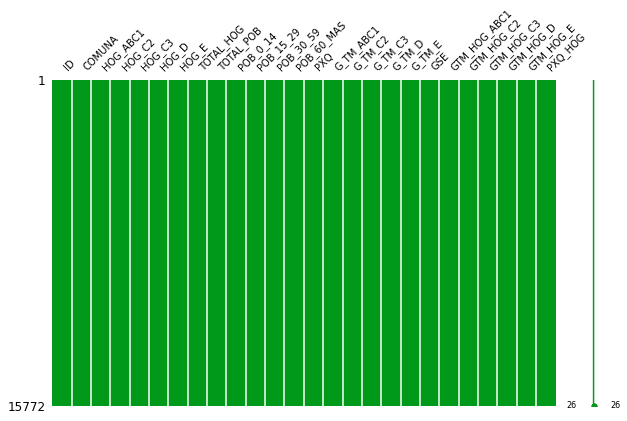

In [13]:
msno.matrix(df, color=(0.0, 0.6, 0.1), figsize=(10,6),fontsize=10)

#### <div style="background-color: #EEF4F4; padding: 10px;"><b>2.6.5 *Estadística descriptiva univariada y multivariada*.</b>

</div>

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,15772.0,93575.878075,65011.440041,6105.0,24374.750000,88481.500000,163894.250000,2.319970e+05
HOG_ABC1,15772.0,8.879977,40.270619,0.0,0.000000,1.000000,3.000000,1.198000e+03
HOG_C2,15772.0,11.478126,33.820255,0.0,0.000000,4.000000,10.000000,1.221000e+03
HOG_C3,15772.0,9.051927,19.786449,0.0,0.000000,5.000000,10.000000,7.680000e+02
HOG_D,15772.0,12.354299,22.545002,0.0,1.000000,5.000000,17.000000,5.280000e+02
HOG_E,15772.0,2.020036,5.237288,0.0,0.000000,0.000000,2.000000,1.480000e+02
TOTAL_HOG,15772.0,43.840604,74.184247,1.0,18.000000,27.000000,40.000000,1.643000e+03
TOTAL_POB,15772.0,133.478062,187.682180,1.0,58.000000,89.000000,136.000000,5.071000e+03
POB_0_14,15772.0,25.574816,35.688962,0.0,11.000000,17.000000,27.000000,1.015000e+03
POB_15_29,15772.0,33.671380,47.504606,0.0,14.000000,22.000000,35.000000,1.311000e+03


Una de las principales carácterísticas que nos arroja el método *describe*, es la alta desviación stándard que presentan las variables que podemos visualizar. La distribución de la población sobre una ciudad como Santiago de Chile y muchas de las ciudades latinoamericanas, genera que a nivel de manzana se presentan distribuciones muy desiguales. La desregulación urbana genera altísimas densidades en algunas zonas y bajísimas en otras (muy diferente a lo que podeos constatar en l'Eixample de Barcelona. La desigualdad territorial genera polos de concentración de grupos socioeconómicos en diferentes sectores de la población. Por lo tanto podemos tener altos peaks de gasto ('G_TM') en pocas manzanas y lo mismo en renta ('PXQ'). En síntesis, la data sobre gasto y renta expresa la gran segregación socioespacial del territorio en Santiago de Chile.

Por su parte las edades representan una estructura mas homogénea o menos dispersa si observamos la diferencia entre media y desviación stándard. Los hogares según grupo socioeconómico también presentan una estructura más homogénea, pero en los grupos de mayores ingresos la desviación stándard se eleva respecto de los otros grupos mas vulnerables.



#### <div style="background-color: #DEF4F4; padding: 10px;"><b>2.7 Graficando las variables del dataset.</b>

</div>

#### <div style="background-color: #EEF4F4; padding: 10px;"><b>2.7.1 *Heatmap y correlación de Pearson*.</b>

</div>

Una gráfica esencial para entender las relaciones de las variables de nuestro dataset, es el mapa de calor. A través del siguiente, podremos entender la intensidad de la correlación en caso de que esta exista (a través del coeficiente de "Pearson") y si estas se expresan de manera directa o inversa.

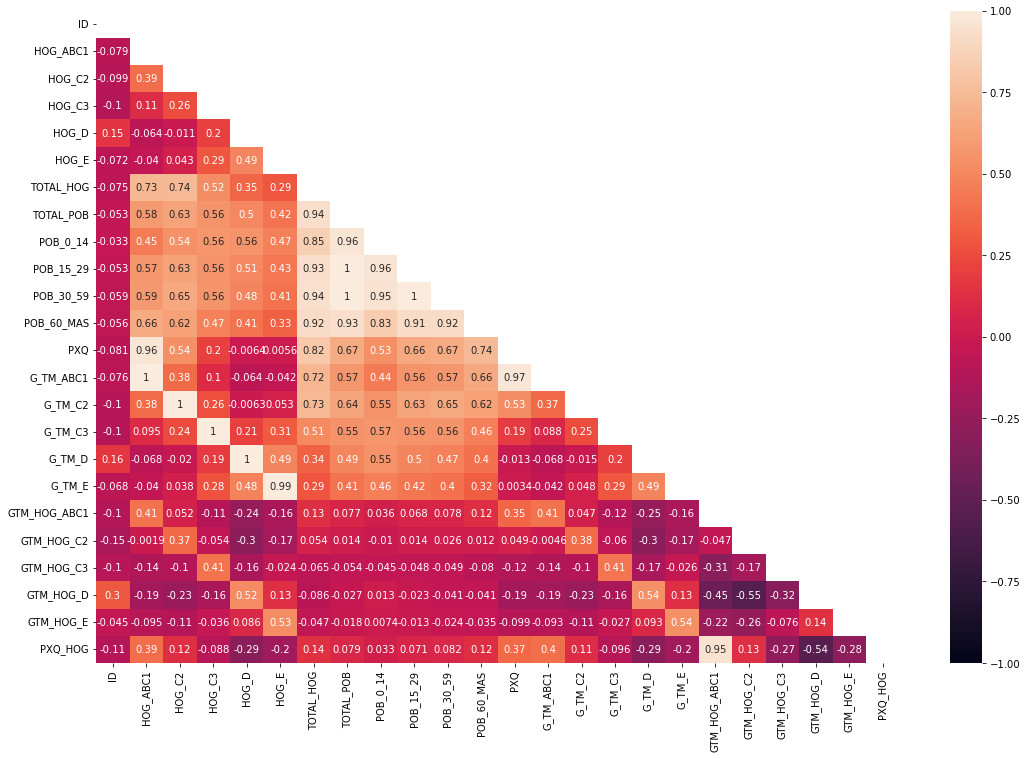

In [15]:
plt.figure(figsize=(18,12))
mask = np.triu(np.ones_like(df.corr()))

sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True)

plt.show()

Lo primero que debemos considerar en este gráfico, es que las variables 'GTM_HOG' para cada grupo socioeconómico pueden no considerarse de mucha relevancia en este análisis, puesto que por su gran similitud con 'G_TM' serán eliminadas en los siguientes apartados.

El heatmap es un excelente herramienta que nos muestra cómo podriamos tener variables que expliquen lo mismo y por tanto generar colinilianidad entre ellas. Es así como las columnas de hogares, abiertos por GSE ('HOG'), presentan correlaciones bastante altas en relación a las edades y al gasto.

Por otra parte, vemos que algunos grupos de edad presentan altas correlaciones entre ellos mismos.

#### <div style="background-color: #EEF4F4; padding: 10px;"><b>2.7.2 *Observando la distribución de las variables. De lo general a lo particular*.</b>

</div>

#### ¿Cómo se distribuyen los grupos socioeconómicos en nuestro dataset?

Cómo ya se ha comentado en la memoria, los municipios ('COMUNA') han sido escogidos dentro de un dataset mayor de manera de poder contener la diversidad socioeconómica en una muestra representativa. De esta manera, una primera gráfica a considerar es cómo se distribuyen las manzanas censales según GSE predominante. ya sabemos que en nuestro dataset una fila describe lo que ocurre en una manzana en particular. 

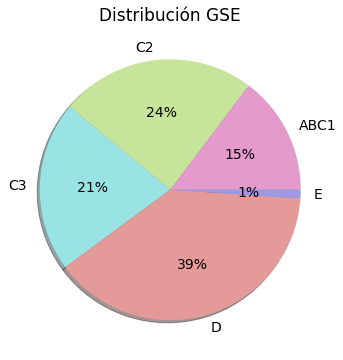

In [16]:
c = ['#E59ACC', '#C6E59A', '#9AE3E5', '#E59A9A', '#9C9AE5']

plt.figure(figsize=(8,6))

df.groupby("GSE").size().plot(kind='pie',autopct='%.0f%%', shadow=True, colors=c, textprops={'fontsize': 14})

plt.title('Distribución GSE', fontsize=17)
plt.ylabel('')
plt.show()

Poemos decir que la muestra escogida a nivel de GSE predominante en solo 8 municipios de los 52 de la ciudad, representa de buena manera la distribución de ellos en el contexto de todo el contexto de sabtiago, inclusive de Chile. El GSE predominante es el "D", un grupo que se consdiera vulnerable socialmente para luego tener la clase media o C3 (21%) y la clase emergente o C2 (24%). Finalmente los grupos extremos ABC1 (15%) y E (1%), representan respectivamente a las clases mas alta y más desfavorecida de la sociedad. 

In [17]:
# Conteo manzanas
df.groupby(["COMUNA", "GSE"]).size().unstack(fill_value=0)

GSE,ABC1,C2,C3,D,E
COMUNA,,,,,
CERRO NAVIA,1,12,103,1088,32
EL BOSQUE,11,105,229,912,11
LA FLORIDA,435,1009,547,941,14
LA PINTANA,2,14,131,1213,56
LAS CONDES,1310,227,43,109,0
MAIPU,141,1876,1750,853,19
PROVIDENCIA,302,301,47,8,3
PUDAHUEL,119,285,483,997,33


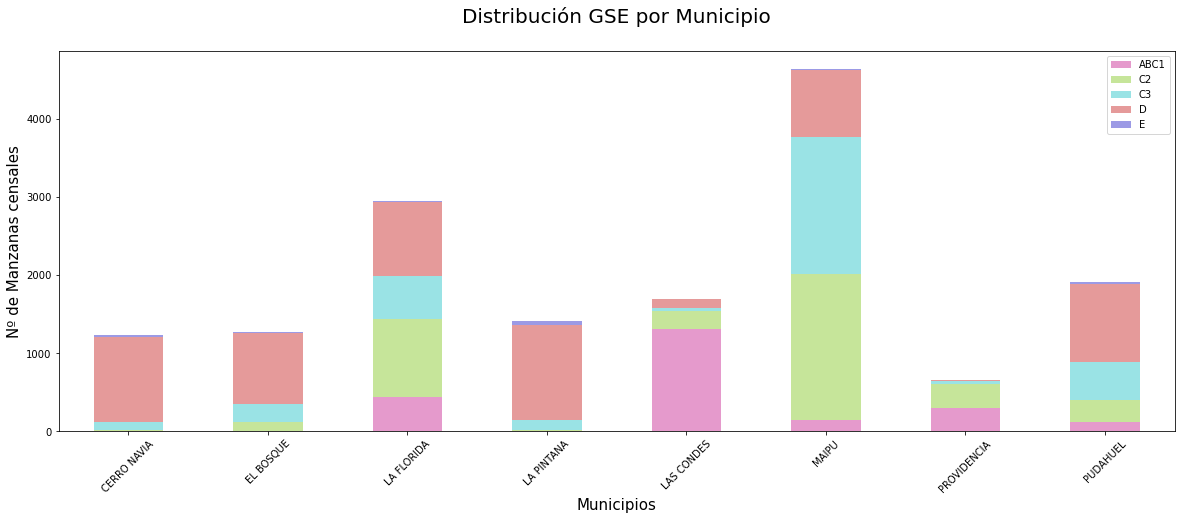

In [18]:
c = ['#E59ACC', '#C6E59A', '#9AE3E5', '#E59A9A', '#9C9AE5']

df.groupby(["COMUNA", "GSE"]).size().unstack(fill_value=0).plot(kind='bar', stacked=True, figsize=(20,7), color=c)

plt.title("Distribución GSE por Municipio\n", fontsize=20)
plt.ylabel("Nº de Manzanas censales", fontsize=15)
plt.xticks(rotation=45)
plt.xlabel("Municipios", fontsize=15)
plt.legend(loc='best')
plt.show()

El gráfico anterior es un excelente resumen no sólo para nuestro dataset sino que también de la realidad de Santiago de Chile.

Las barras más altas representan aquellos municipios con el mayor número de manzanas y por tanto la mayor superficie de todas. Por tanto Maipú y La Florida ya nos advierten que son los municipios más grandes del dataset y de la ciudad. En ellos es posible encontrar un surtido bastante heterogéneo a nivel de realidades socioeconómicas, sin embargo no dejan de tener la mayor proporción en las clases medias (GSE C3, D y E). Por su parte, municipios como Providencia poseen casi la mitad de sus manzanas bajo el predominio de la clase alta (ABC1). Sin olvidar porsupuesto el clásico municipio de Las Condes donde casi el 95% de las manzanas no salen del ABC1 y el C2.

Finalmente los grupos más vulnerables (D y E) los podemos encontrar en Cerro Navia, El Bosque, La Pintana y Pudahuel (todos ellos con una cabtidad de manzanas bastante menos y por tanto distribuidas en territorios más pequeños).

### Gasto total por GSE por municipio

In [19]:
df.groupby('COMUNA').sum()[['G_TM_ABC1','G_TM_C2','G_TM_C3','G_TM_D','G_TM_E']].round(1)

,G_TM_ABC1,G_TM_C2,G_TM_C3,G_TM_D,G_TM_E
COMUNA,,,,,
CERRO NAVIA,29493.3,159939.0,317371.9,655599.8,48848.2
EL BOSQUE,131458.1,386615.7,518446.9,632924.3,36337.0
LA FLORIDA,1222001.1,2363659.2,1171664.6,712092.0,61918.4
LA PINTANA,81985.7,237858.2,419483.1,868640.2,80548.6
LAS CONDES,7693034.6,2119897.1,318170.2,95522.5,6022.1
MAIPU,1015107.7,3318313.0,2263807.6,872392.3,35474.1
PROVIDENCIA,2609973.0,1983980.7,360490.0,44088.2,2976.7
PUDAHUEL,588284.9,881139.7,805292.6,662054.1,59589.8


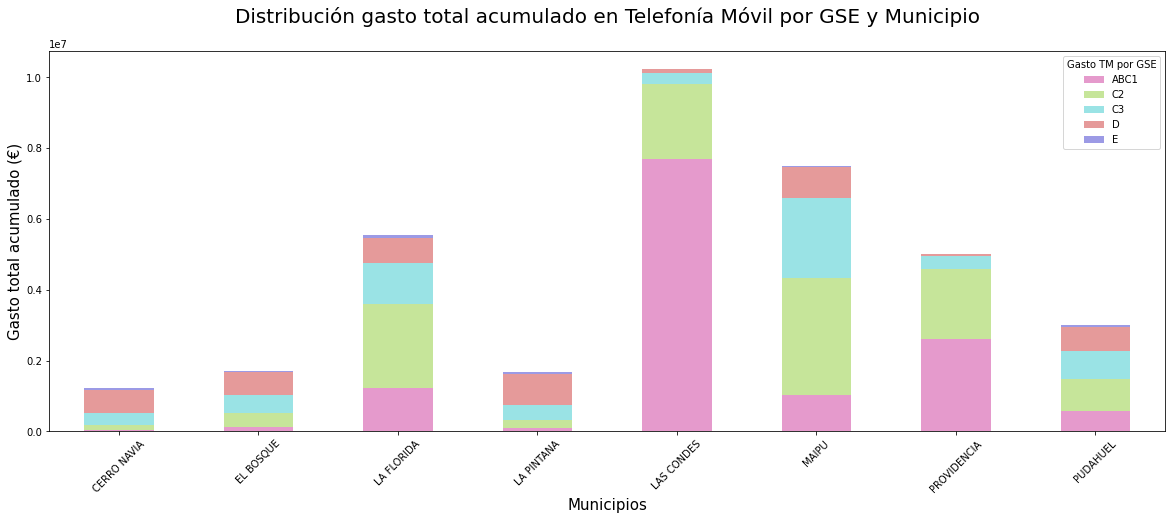

In [20]:
df.groupby('COMUNA').sum()[['G_TM_ABC1','G_TM_C2','G_TM_C3','G_TM_D','G_TM_E']].round(1).plot(kind='bar', stacked=True, figsize=(20,7), color=c)

plt.title("Distribución gasto total acumulado en Telefonía Móvil por GSE y Municipio\n", fontsize=20)
plt.ylabel("Gasto total acumulado (€)", fontsize=15)
plt.xticks(rotation=45)
plt.xlabel("Municipios", fontsize=15)
plt.legend(title='Gasto TM por GSE', labels=['ABC1', 'C2', 'C3', 'D', 'E'], loc='best')

plt.show()



Con gráfico anterior, comenzamos a ver de manera mas dura la realidad a nivel de poder adquisitivo. El grupo ABC1 de Las Condes concentra prácticamente el mismo gasto en telefonia Móvil que todos los municipios restante juntos. Mientras tanto en el resto de los municipios la realidad es que a nivel GSE más alto mayor el gasto en telefonia móvil (como tendencia general).

### Gasto total acumulado por GSE

In [21]:
df[['G_TM_ABC1','G_TM_C2','G_TM_C3','G_TM_D','G_TM_E']].sum()

G_TM_ABC1    1.337134e+07
G_TM_C2      1.145140e+07
G_TM_C3      6.174727e+06
G_TM_D       4.543314e+06
G_TM_E       3.317150e+05
dtype: float64

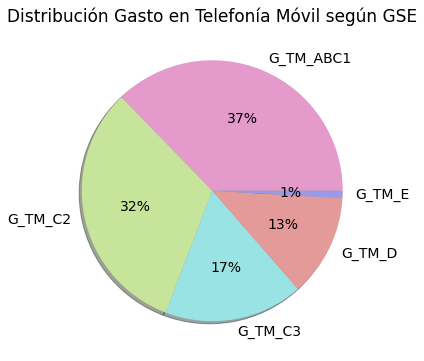

In [22]:
plt.figure(figsize=(8,6))
plt.title('Distribución Gasto en Telefonía Móvil según GSE', fontsize=17)

df[['G_TM_ABC1','G_TM_C2','G_TM_C3','G_TM_D','G_TM_E']].sum().plot(kind='pie',autopct='%.0f%%', shadow=True, colors=c, textprops={'fontsize': 14})
plt.ylabel('')

plt.show()

El gráfico anterior sirve no solo para conocer cómo se distribuye el Gasto en Telefonia móvil según GSE sino que también para reforzar la idea de que el ABC1 concentra la mayor parte del gasto (segñun vimos en el ejemplo anterior con Las Condes).

### Gasto promedio por hogar por GSE

In [23]:
df[['GTM_HOG_ABC1','GTM_HOG_C2','GTM_HOG_C3','GTM_HOG_D','GTM_HOG_E']].mean()

GTM_HOG_ABC1    13.681513
GTM_HOG_C2      15.037001
GTM_HOG_C3      10.105714
GTM_HOG_D        7.740789
GTM_HOG_E        0.572523
dtype: float64

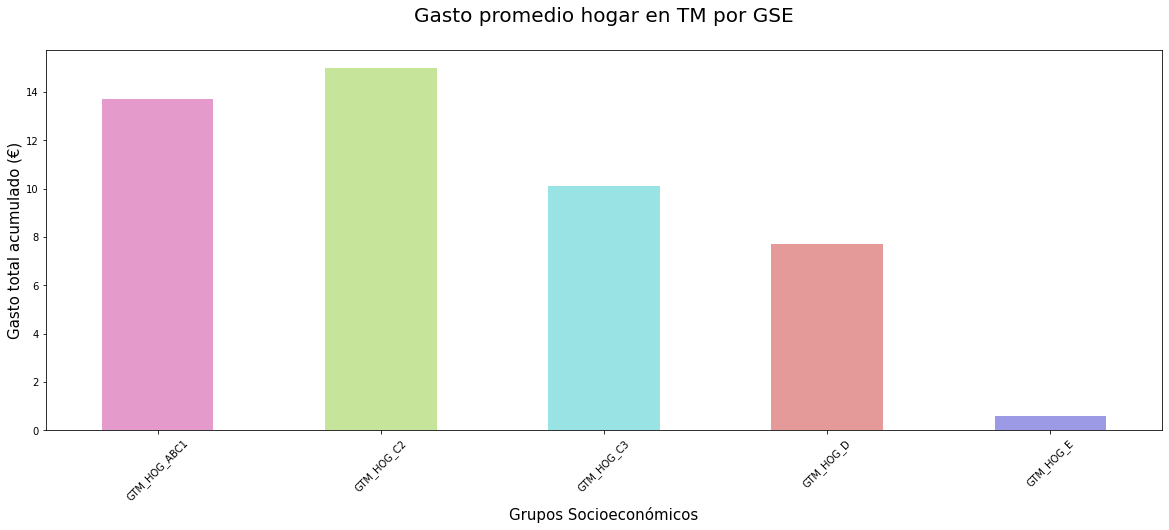

In [24]:
df[['GTM_HOG_ABC1','GTM_HOG_C2','GTM_HOG_C3','GTM_HOG_D','GTM_HOG_E']].mean().round(1).plot(kind='bar', figsize=(20,7), color=c)

plt.title("Gasto promedio hogar en TM por GSE\n", fontsize=20)
plt.ylabel("Gasto total acumulado (€)", fontsize=15)
plt.xticks(rotation=45)
plt.xlabel("Grupos Socioeconómicos", fontsize=15)

plt.show()

El gráfico anterior muestra cómo al dividir los valores de gasto por hogar (obteniendo el promedio de gasto por hogar), los datos se homogenizan y resulta ahora que el GSE C2 se manifiesta en el top de gasto. Es decir, los hogares C2 tendrian un mayor valor unitario si se lo compara como grupo. Es decir, los hogares C2 serían un cliente más atractivo que cualquier otro porque están dispuestos a pagar por ejemplo un plan de telefonía más costoso.

### Gasto vs Renta

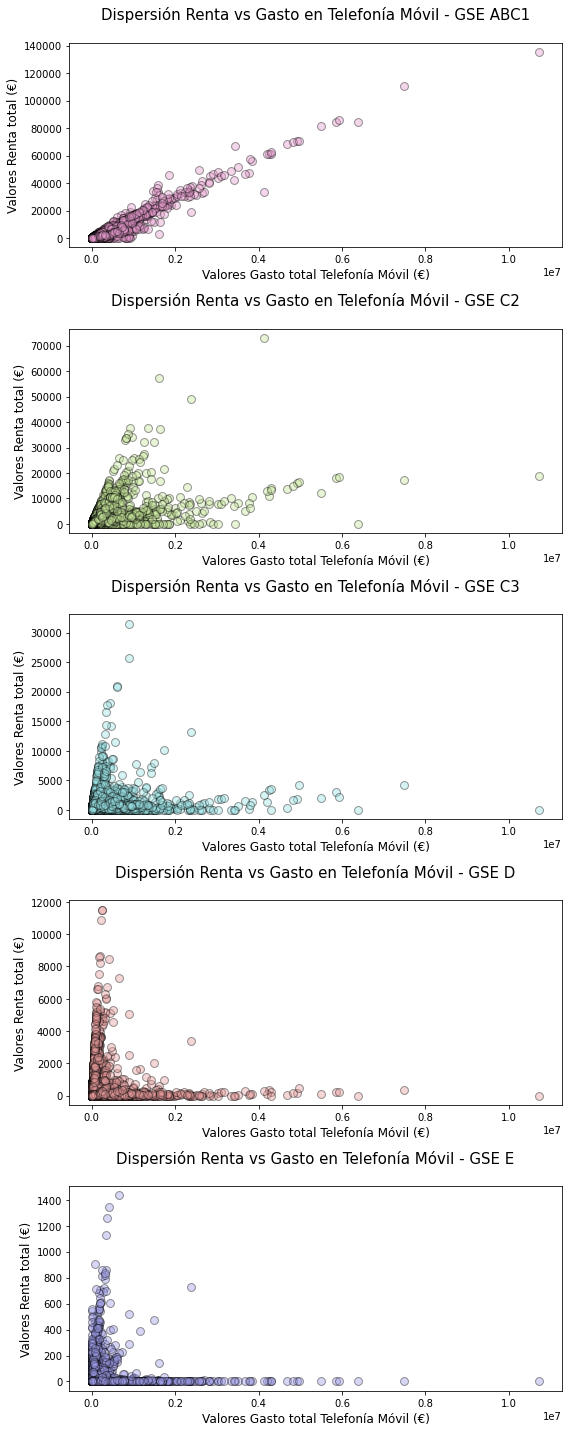

In [25]:
fig, axes = plt.subplots(5, 1, figsize=(8, 20))

grupos = ['ABC1', 'C2', 'C3', 'D', 'E']
colores = ['#E59ACC', '#C6E59A', '#9AE3E5', '#E59A9A', '#9C9AE5']

for i, grupo in enumerate(grupos):
    ax = axes[i]
    x = df.PXQ
    y = df[f'G_TM_{grupo}']
    area = np.pi * 20
    ax.scatter(x, y, s=area, c=colores[i], alpha=0.4, edgecolors='black')
    ax.set_title(f'Dispersión Renta vs Gasto en Telefonía Móvil - GSE {grupo}\n', fontsize=15)
    ax.set_ylabel('Valores Renta total (€)', fontsize=12)
    ax.set_xlabel('Valores Gasto total Telefonía Móvil (€)', fontsize=12)

plt.tight_layout()


Siguiendo la misma líne del análisis, los GSE más altos (ABC1 y C2) presentan una mejor correlación con el gasto producto de que son ellos quienes consumen mayormente (de forma acumulada) la ofera en telefonía móvil.

### <div style="background-color: #BCF5F5; padding: 10px;"><b>Parte 3. Eliminación de columnas previo al preprocesado.</b>
</div>

En la exploración de variables hemos podido analizar el comportamiento de las manzanas censales a nivel general y particular. Hemos creado columnas bajo la premisa de aportar información tanto para contextualizar como para aportar en la posterior predicción. Sin embargo, también hemos podido ver como algunas de las variables que aún contiene el dataset realmente no aportan mucho valor ya que duplican información o directamente no aportan valor predictivo por no estar directamente relacionadas con el objetivo.

A continuación crearemos una copia de nuestro dataset actual que posteriormente lo editaremos tal y como hemos expuesto. Este dataset será aquel que someteremos al preprocesamiento para entrenar nuestro modelo y así predecir el Gasto total en Telefonía móvil por manzanas para el segmento ABC1.

#### <div style="background-color: #DEF4F4; padding: 10px;"><b>3.1 generando una copia del dataset.</b>

</div>

In [26]:
df1 = df.copy()

df1.head()

,ID,COMUNA,HOG_ABC1,HOG_C2,HOG_C3,HOG_D,HOG_E,TOTAL_HOG,TOTAL_POB,POB_0_14,...,G_TM_C3,G_TM_D,G_TM_E,GSE,GTM_HOG_ABC1,GTM_HOG_C2,GTM_HOG_C3,GTM_HOG_D,GTM_HOG_E,PXQ_HOG
0,6105,PUDAHUEL,8,30,8,2,2,50,124,23,...,370.888949,47.597260,20.509310,C2,14.606702,41.658168,7.417779,0.951945,0.410186,1816.734815
1,6106,PUDAHUEL,0,0,0,17,0,17,56,10,...,0.000000,404.576713,0.000000,D,0.000000,0.000000,0.000000,23.798630,0.000000,497.907901
2,6108,PUDAHUEL,1,7,12,7,1,28,85,17,...,556.333424,166.590411,10.254655,C3,3.260425,17.357570,19.869051,5.949658,0.366238,1085.948474
3,6109,PUDAHUEL,2,6,20,7,2,37,121,24,...,927.222373,166.590411,20.509310,C3,4.934697,11.258964,25.060064,4.502444,0.554306,1083.984610
4,6110,PUDAHUEL,0,3,22,5,0,30,105,21,...,1019.944611,118.993151,0.000000,C3,0.000000,6.943028,33.998154,3.966438,0.000000,923.475288


#### <div style="background-color: #DEF4F4; padding: 10px;"><b>3.2 Eliminando las últimas columnas en el nuevo dataset.</b>

</div>

In [27]:
df1.head()

,ID,COMUNA,HOG_ABC1,HOG_C2,HOG_C3,HOG_D,HOG_E,TOTAL_HOG,TOTAL_POB,POB_0_14,...,G_TM_C3,G_TM_D,G_TM_E,GSE,GTM_HOG_ABC1,GTM_HOG_C2,GTM_HOG_C3,GTM_HOG_D,GTM_HOG_E,PXQ_HOG
0,6105,PUDAHUEL,8,30,8,2,2,50,124,23,...,370.888949,47.597260,20.509310,C2,14.606702,41.658168,7.417779,0.951945,0.410186,1816.734815
1,6106,PUDAHUEL,0,0,0,17,0,17,56,10,...,0.000000,404.576713,0.000000,D,0.000000,0.000000,0.000000,23.798630,0.000000,497.907901
2,6108,PUDAHUEL,1,7,12,7,1,28,85,17,...,556.333424,166.590411,10.254655,C3,3.260425,17.357570,19.869051,5.949658,0.366238,1085.948474
3,6109,PUDAHUEL,2,6,20,7,2,37,121,24,...,927.222373,166.590411,20.509310,C3,4.934697,11.258964,25.060064,4.502444,0.554306,1083.984610
4,6110,PUDAHUEL,0,3,22,5,0,30,105,21,...,1019.944611,118.993151,0.000000,C3,0.000000,6.943028,33.998154,3.966438,0.000000,923.475288


In [28]:
df1.drop(['HOG_ABC1','HOG_C2','HOG_C3','HOG_D','HOG_E','COMUNA','GTM_HOG_ABC1','GTM_HOG_C2','GTM_HOG_C3','GTM_HOG_D','GTM_HOG_E','PXQ_HOG','TOTAL_HOG','TOTAL_POB', 'POB_15_29'], axis=1, inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15772 entries, 0 to 19817
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          15772 non-null  int64  
 1   POB_0_14    15772 non-null  int64  
 2   POB_30_59   15772 non-null  int64  
 3   POB_60_MAS  15772 non-null  int64  
 4   PXQ         15772 non-null  float64
 5   G_TM_ABC1   15772 non-null  float64
 6   G_TM_C2     15772 non-null  float64
 7   G_TM_C3     15772 non-null  float64
 8   G_TM_D      15772 non-null  float64
 9   G_TM_E      15772 non-null  float64
 10  GSE         15772 non-null  object 
dtypes: float64(6), int64(4), object(1)
memory usage: 1.4+ MB


### <div style="background-color: #BCF5F5; padding: 10px;"><b>Parte 4. Preprocesado.</b>
</div>

Dejaremos el campo "ID" como éndice ya que es un valor único y que hace referencia a qué manzana censal esxacte corresponde la información. Es posible que este campo no lo utilicemos más adelante, pero como no tenemos seguridad esto entonces lo mantendremos.

In [29]:
df1.set_index("ID", inplace=True)
df1.head()

,POB_0_14,POB_30_59,POB_60_MAS,PXQ,G_TM_ABC1,G_TM_C2,G_TM_C3,G_TM_D,G_TM_E,GSE
ID,,,,,,,,,,
6105,23,53,13,90836.740771,730.335113,2082.908381,370.888949,47.597260,20.509310,C2
6106,10,24,8,8464.434310,0.000000,0.000000,0.000000,404.576713,0.000000,D
6108,17,34,12,30406.557266,91.291889,486.011956,556.333424,166.590411,10.254655,C3
6109,24,50,15,40107.430585,182.583778,416.581676,927.222373,166.590411,20.509310,C3
6110,21,42,15,27704.258633,0.000000,208.290838,1019.944611,118.993151,0.000000,C3


In [30]:
print(df1.index.name)

ID


#### <div style="background-color: #DEF4F4; padding: 10px;"><b>4.1 Detectando tipos de distribuciones y outliers.</b>

</div>

#### <div style="background-color: #EEF4F4; padding: 10px;"><b>4.1.1 *Detectando outliers*.</b>

</div>

In [31]:
df1_num = df1[['POB_0_14',
       'POB_30_59', 'POB_60_MAS', 'PXQ', 'G_TM_ABC1', 'G_TM_C2',
       'G_TM_C3', 'G_TM_D', 'G_TM_E']]

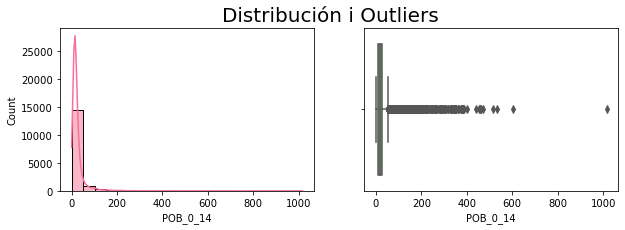

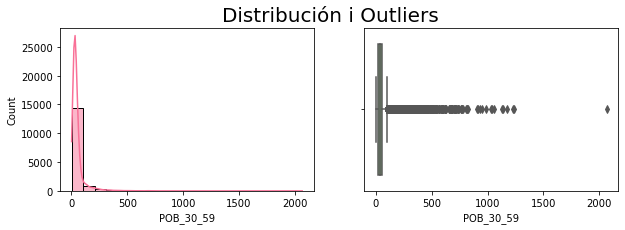

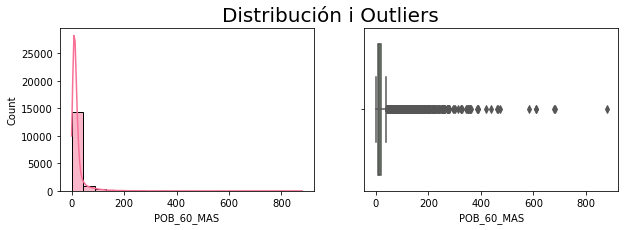

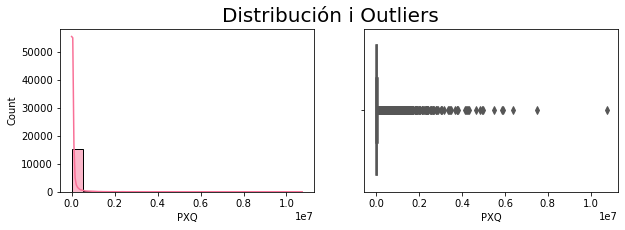

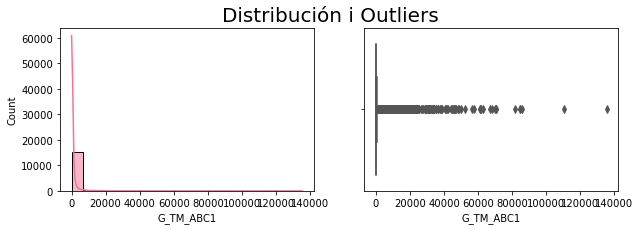

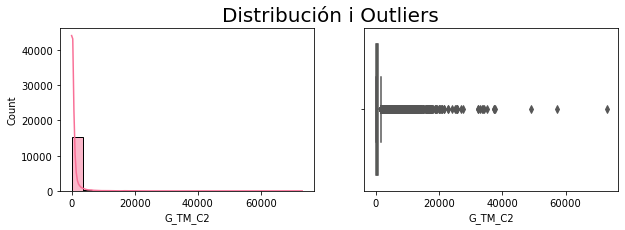

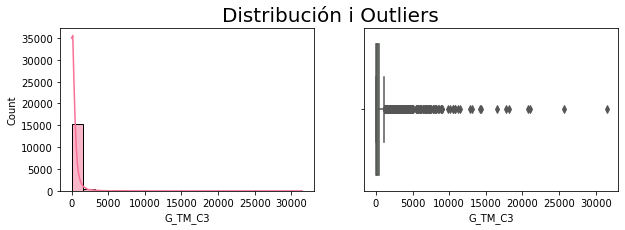

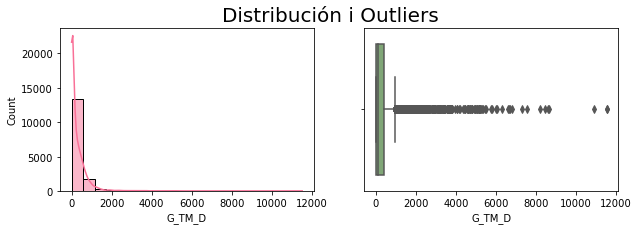

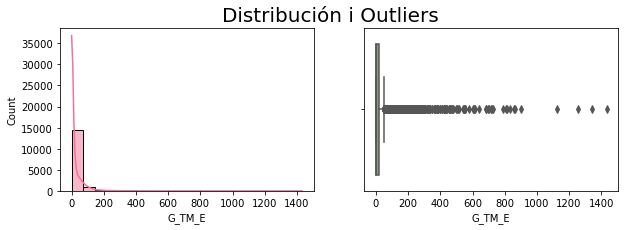

In [32]:
for atribut in df1_num:
    fig, axes = plt.subplots(1,2, figsize = (10,3))
    fig.suptitle('Distribución i Outliers', fontsize=20)
    sns.histplot(data=df1_num, ax=axes[0],  x=df1_num[atribut], bins=20, color='#F97097', kde=True)
    sns.boxplot(ax=axes[1], x =df1_num[atribut], color='#7BAE6F')
    

plt.show()

#### <div style="background-color: #EEF4F4; padding: 10px;"><b>4.1.2 *Test de Shapiro*.</b>

</div>

#### Comprobaremos los siguiente para todos los atributos numéricos del dataset:

1. Hipòtesi nul·la (H0): La mostra té una distribució normal
2. Hipòtesi alternativa (H1): La mostra no té una distribució normal

In [33]:
for i in df1_num.columns:
    shapiro_test = stats.shapiro(df1_num[i])
    print('La variable',i, "té un p-value de ", shapiro_test.pvalue)
    if shapiro_test.pvalue>0.05:
        print('\033[1mNo podem\033[0m rebutjar hipotesis nula, la mostra \033[1mTé\033[0m una distribució normal.\n')
    else:
        print("\033[1mPodem\033[0m rebutjar l'hipotesis nula, la mostra \033[1mNo té\033[0m una distribució normal.\n")

La variable POB_0_14 té un p-value de  0.0
Podem rebutjar l'hipotesis nula, la mostra No té una distribució normal.

La variable POB_30_59 té un p-value de  0.0
Podem rebutjar l'hipotesis nula, la mostra No té una distribució normal.

La variable POB_60_MAS té un p-value de  0.0
Podem rebutjar l'hipotesis nula, la mostra No té una distribució normal.

La variable PXQ té un p-value de  0.0
Podem rebutjar l'hipotesis nula, la mostra No té una distribució normal.

La variable G_TM_ABC1 té un p-value de  0.0
Podem rebutjar l'hipotesis nula, la mostra No té una distribució normal.

La variable G_TM_C2 té un p-value de  0.0
Podem rebutjar l'hipotesis nula, la mostra No té una distribució normal.

La variable G_TM_C3 té un p-value de  0.0
Podem rebutjar l'hipotesis nula, la mostra No té una distribució normal.

La variable G_TM_D té un p-value de  0.0
Podem rebutjar l'hipotesis nula, la mostra No té una distribució normal.

La variable G_TM_E té un p-value de  0.0
Podem rebutjar l'hipotesis n

#### <div style="background-color: #EEF4F4; padding: 10px;"><b>4.1.2 *Elección del tipo de transformación*.</b>

</div>

Como hemos podido ver, todas nuestras variables tienen outliers y ninguna de ellas presenta una distribución normal. Por lo tanto tenemos dos dos formas de preprocesar nuestras variables:

1. Para nuestra única variable categórica aplicaremos una transformación **"One Hot"**, quedando valores binarios para los grupos socioeconómicos predominantes.

2. Para el resto de variables numéricas (con outliers y sin distribución gausiana) aplicaremos **"RobustScaler"**.

#### <div style="background-color: #EEF4F4; padding: 10px;"><b>4.1.3 *Declaración de tipos de transformación y columnas a transformar.*</b>

</div>

Dentro de One Hot pasaremos el argumento "drop=first" para asegurarnos de que solo considere las variables indicadas y no otras que puedan existir en el dataset.

In [34]:
# Para Variable 'GSE' Categórica
onehot = OneHotEncoder(drop="first", handle_unknown="ignore")
# Para Variables numéricas con outliers
robust = RobustScaler()

Pondremos todos los campos a transformar y lo guardaremos en un objeto que podamos utilizar más adelante de manera automática y mucho más rápida en pipelines.

In [35]:
prep = ColumnTransformer([("Dummie", onehot, ['GSE']),
                         ("Robust", robust, ['POB_0_14', 
                         'POB_30_59', 'POB_60_MAS', 'PXQ','G_TM_ABC1', 'G_TM_C3', 'G_TM_D','G_TM_E'])], 
                         remainder = "drop")

#### <div style="background-color: #EEF4F4; padding: 10px;"><b>4.1.4 *Separación de target y features.*</b>

</div>

Primero crearemos un objeto "X" donde dejaremos todas las columnas de nuestro dataset que participarán en el modelo predictivo (Train).  Luego un objeto "y" que contendrá el target. 

In [36]:
# Features
X = df1.drop(['G_TM_C2'], axis = 1)

# target
y = df1['G_TM_C2']

print("Registros y columnas en features:", X.shape)
print("Registros Target G_TM_ABC1:", y.shape)

Registros y columnas en features: (15772, 9)
Registros Target G_TM_ABC1: (15772,)


### <div style="background-color: #BCF5F5; padding: 10px;"><b>Parte 5. Aplicación de Modelos de Regresión.</b>
</div>

#### <div style="background-color: #DEF4F4; padding: 10px;"><b>5.1 Elección y declaración de modelos de regresión.</b>

</div>

Aplicaremos dos de los modelos de regresión más utilizados en machine learning y comprobaremos su performance aplicando diferentes métodos y métricas. 

In [37]:
LR = LinearRegression()
KNR = KNeighborsRegressor()

#### <div style="background-color: #DEF4F4; padding: 10px;"><b>5.2 Aplicación de Pipeline para el preprocesado.</b>

</div>

Guardaremos en un objeto tanto el modelo que hemos declarado como el preprocesamiento que hemos desarrollado en la parte 4.

In [38]:
LR_pipe = Pipeline([('prep',prep), ('LR', LR)])
KNR_pipe = Pipeline([('prep',prep), ('KNR', KNR)])

In [39]:
LR_pipe

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('Dummie',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['GSE']),
                                                 ('Robust', RobustScaler(),
                                                  ['POB_0_14', 'POB_30_59',
                                                   'POB_60_MAS', 'PXQ',
                                                   'G_TM_ABC1', 'G_TM_C3',
                                                   'G_TM_D', 'G_TM_E'])])),
                ('LR', LinearRegression())])

#### <div style="background-color: #DEF4F4; padding: 10px;"><b>5.3 Partición del dataset en Train y Test.</b>

</div>

Por las características de nuestro dataset y el objetivo que perseguimos una división de 70% y 30% entre train y test suena bastante lógico.

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### <div style="background-color: #DEF4F4; padding: 10px;"><b>5.4 Evaluando la performance de los dos modelos.</b>

</div>

In [41]:
models = [
    {"titulo": "LR", "modelo": LR_pipe},
    {"titulo": "KNR", "modelo": KNR_pipe}
]

for model_dict in models:
    titulo = model_dict["titulo"]
    modelo = model_dict["modelo"]
    
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Mean Absolute Error modelo {titulo}: {mae:.1f}")
    print(f"R2 modelo {titulo}: {r2:.3f}")
    print()


Mean Absolute Error modelo LR: 297.7
R2 modelo LR: 0.887

Mean Absolute Error modelo KNR: 163.4
R2 modelo KNR: 0.917



#### <div style="background-color: #DEF4F4; padding: 10px;"><b>5.4 Ahora evaluando con Validación Cruzada.</b>

</div>

In [42]:
LR_pipe = Pipeline([('prep',prep), ('LR', LinearRegression())])
KNR_pipe = Pipeline([('prep',prep), ('KNR', KNeighborsRegressor())])


models = [
    {"titulo": "LR", "modelo": LR_pipe},
    {"titulo": "KNR", "modelo": KNR_pipe}
]

for model_dict in models:
    titulo = model_dict["titulo"]
    modelo = model_dict["modelo"]
    
    cv = cross_validate(modelo, X, y, cv=5)
    cv_scoring = cross_validate(modelo, X, y, cv=5, scoring=["neg_mean_absolute_error", "r2"])
    mae = -cv_scoring["test_neg_mean_absolute_error"]
    r2 = cv_scoring["test_r2"]
    
    print(titulo)
    print(cv['test_score'])
    print(f"Mean Absolute Error: {mae.mean():.1f} +/- {mae.std():.1f}")
    print(f"R2 accuracy: {r2.mean():.3f} +/- {r2.std():.3f}")
    print()


LR
[0.87504242 0.89307247 0.76594154 0.8772583  0.84858363]
Mean Absolute Error: 326.2 +/- 84.4
R2 accuracy: 0.852 +/- 0.045

KNR
[0.88962874 0.84539833 0.90545645 0.8411315  0.74287352]
Mean Absolute Error: 202.7 +/- 63.9
R2 accuracy: 0.845 +/- 0.057



#### <div style="background-color: #DEF4F4; padding: 10px;"><b>5.5 Estableciendo hiperparámetros para mejorar la calidad de la predicción.</b>

</div>

In [43]:
lr_pipe_params = LR_pipe.get_params()
print(lr_pipe_params)

{'memory': None, 'steps': [('prep', ColumnTransformer(transformers=[('Dummie',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 ['GSE']),
                                ('Robust', RobustScaler(),
                                 ['POB_0_14', 'POB_30_59', 'POB_60_MAS', 'PXQ',
                                  'G_TM_ABC1', 'G_TM_C3', 'G_TM_D',
                                  'G_TM_E'])])), ('LR', LinearRegression())], 'verbose': False, 'prep': ColumnTransformer(transformers=[('Dummie',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 ['GSE']),
                                ('Robust', RobustScaler(),
                                 ['POB_0_14', 'POB_30_59', 'POB_60_MAS', 'PXQ',
                                  'G_TM_ABC1', 'G_TM_C3', 'G_TM_D',
      

In [44]:
lr_estimator_params = LR_pipe.named_steps['LR'].get_params()
print(lr_estimator_params)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}


In [45]:
knr_pipe_params = KNR_pipe.get_params()
print(lr_pipe_params)

{'memory': None, 'steps': [('prep', ColumnTransformer(transformers=[('Dummie',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 ['GSE']),
                                ('Robust', RobustScaler(),
                                 ['POB_0_14', 'POB_30_59', 'POB_60_MAS', 'PXQ',
                                  'G_TM_ABC1', 'G_TM_C3', 'G_TM_D',
                                  'G_TM_E'])])), ('LR', LinearRegression())], 'verbose': False, 'prep': ColumnTransformer(transformers=[('Dummie',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 ['GSE']),
                                ('Robust', RobustScaler(),
                                 ['POB_0_14', 'POB_30_59', 'POB_60_MAS', 'PXQ',
                                  'G_TM_ABC1', 'G_TM_C3', 'G_TM_D',
      

In [46]:
knr_estimator_params = KNR_pipe.named_steps['KNR'].get_params()
print(knr_estimator_params)

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


In [47]:
LR_params = {"LR__copy_X": [True, False],
            "LR__fit_intercept": [True, False],
            "LR__n_jobs": [-1, None, 1],
            "LR__positive": [True, False]}

KNR_params = {"KNR__n_neighbors": [int(x) for x in np.linspace(start = 1, stop = 30, num = 3)],
              "KNR__weights": ["uniform", "distance"],
              "KNR__algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
              "KNR__leaf_size": [int(x) for x in np.linspace(start = 5, stop = 50, num = 5)],
              "KNR__p": [int(x) for x in np.linspace(start = 1, stop = 4, num = 1)]}

#### <div style="background-color: #DEF4F4; padding: 10px;"><b>5.6 Buscando hiperparámetros para mejorar la calidad de la predicción.</b>

</div>

In [48]:
LR_pipe = Pipeline([('prep',prep), ('LR', LinearRegression())])
KNR_pipe = Pipeline([('prep',prep), ('KNR', KNeighborsRegressor())])


lrs = [("LR", LR_pipe), ("KNR", KNR_pipe)]
hp_params = [("LR", LR_params), ("KNR", KNR_params)]

for titulo, modelo in lrs:
    params = next(hp for hp in hp_params if hp[0] == titulo)[1]
    
    grids = RandomizedSearchCV(modelo, params, cv=5, scoring=['r2', 'neg_mean_absolute_error'], refit='neg_mean_absolute_error', random_state=42)
    grids.fit(X, y)
    y_pred = grids.predict(X)
    r2 = r2_score(y, y_pred)
    
    print(titulo)
    print(f"Los mejores hyperparámetros para {titulo} son: {grids.best_params_}\n")

LR
Los mejores hyperparámetros para LR son: {'LR__positive': False, 'LR__n_jobs': -1, 'LR__fit_intercept': True, 'LR__copy_X': False}

KNR
Los mejores hyperparámetros para KNR son: {'KNR__weights': 'distance', 'KNR__p': 1, 'KNR__n_neighbors': 1, 'KNR__leaf_size': 50, 'KNR__algorithm': 'ball_tree'}



#### <div style="background-color: #DEF4F4; padding: 10px;"><b>5.7 Declarando hiperparámetros para mejorar la calidad de la predicción.</b>

</div>

In [49]:
LR_pipe = Pipeline([('prep',prep), ('LR', LinearRegression())])
KNR_pipe = Pipeline([('prep',prep), ('KNR', KNeighborsRegressor())])

In [50]:
LR = LinearRegression(positive = False, n_jobs = -1, fit_intercept = True, copy_X = False)
KNR = KNeighborsRegressor(weights = 'distance', p = 1, n_neighbors = 1, leaf_size = 50, algorithm = 'ball_tree')

#### <div style="background-color: #DEF4F4; padding: 10px;"><b>5.8 Actualizando y aplicando hiperparámetros en los modelos.</b>

</div>

In [51]:
LR_pipe = Pipeline([('prep',prep), ('LR', LR)])
KNR_pipe = Pipeline([('prep',prep), ('KNR', KNR)])

#### <div style="background-color: #DEF4F4; padding: 10px;"><b>5.8 Recalculando métricas con nuevos hiperparámetros.</b>

</div>

In [52]:
lrs = [("LR", LR_pipe), ("KNR", KNR_pipe)]

for titulo, modelo in lrs:
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print("Mean Absolute Error modelo {}: {:.2f}".format(titulo, mae))
    print("R2 modelo {}: {:.5f}".format(titulo, r2))
    print()

Mean Absolute Error modelo LR: 297.69
R2 modelo LR: 0.88675

Mean Absolute Error modelo KNR: 171.00
R2 modelo KNR: 0.89269



### <div style="background-color: #BCF5F5; padding: 10px;"><b>Parte 6. Graficando la predicción.</b>
</div>

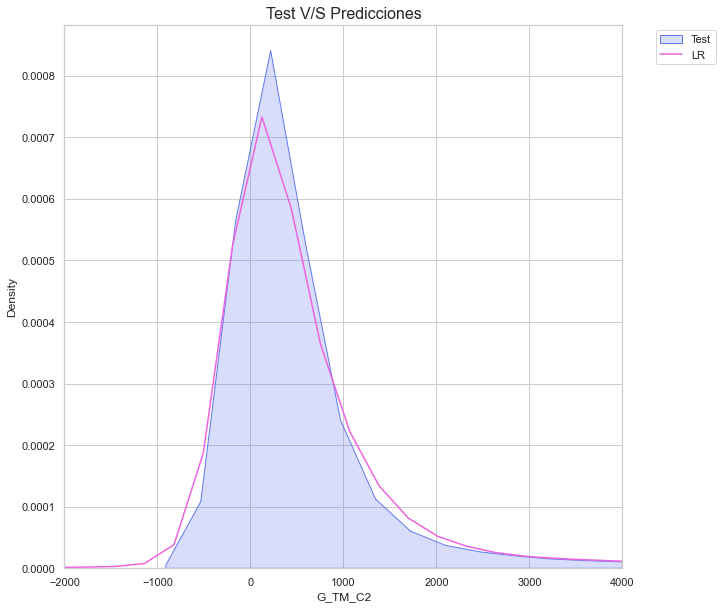

In [54]:
# plot predictions with differents options
sns.set(rc={"figure.figsize": (10, 10)})
sns.set(style= "whitegrid")
sns.kdeplot(y, label='Test', color='#627AEF', fill=True)
sns.kdeplot(LR_pipe.predict(X), label='LR', color='#EF62DE', fill=False)

plt.xlim(-2000, 4000)
plt.title("Test V/S Predicciones", fontsize = 16)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### <div style="background-color: #BCF5F5; padding: 10px;"><b>Parte 7. Visualizando la predicción en un dataframe.</b>
</div>

In [56]:
X = df1.drop(['G_TM_C2'], axis = 1)

yknr_pred = KNR_pipe.predict(X)

yknr_pred

array([ 1735.75698403,     0.        ,   486.01195553, ...,
        2782.58163974, 26837.16677247,  6369.02019762])

In [68]:
df1['G_TM_C2_PRED'] = yknr_pred

df1.head(10).round(2)

,POB_0_14,POB_30_59,POB_60_MAS,PXQ,G_TM_ABC1,G_TM_C2,G_TM_C3,G_TM_D,G_TM_E,GSE,G_TM_C2_PRED
ID,,,,,,,,,,,
6105,23,53,13,90836.74,730.34,2082.91,370.89,47.60,20.51,C2,1735.76
6106,10,24,8,8464.43,0.00,0.00,0.00,404.58,0.00,D,0.00
6108,17,34,12,30406.56,91.29,486.01,556.33,166.59,10.25,C3,486.01
6109,24,50,15,40107.43,182.58,416.58,927.22,166.59,20.51,C3,347.15
6110,21,42,15,27704.26,0.00,208.29,1019.94,118.99,0.00,C3,208.29
6111,31,92,27,44212.71,273.88,347.15,370.89,713.96,112.80,D,347.15
6112,24,56,11,26983.56,182.58,208.29,185.44,452.17,61.53,D,208.29
6113,24,51,15,21413.75,91.29,208.29,185.44,380.78,51.27,D,208.29
6114,16,43,15,28796.81,0.00,486.01,463.61,356.98,20.51,D,127.96


### <div style="background-color: #BCF5F5; padding: 10px;"><b>Parte 8. Comentarios y conclusiones.</b>
</div>

En síntesis, hemos dividido nuestro dataset entre features y target. Luego, hemos separado nuestro conjunto datos entre Train y Test con una distribución 70% (train) y 30% (test), de manera de tener una buena cantidad de datos para entrenar nuestro modelo. Por otro lado hemos utilizado pipeline como transformador y procesador de neustro conjunto de datos, con esto hemos conseguido automatizar y eficientar el flujo de trabajo con un código mucho más eficiente.

**Ahora Hablemos un poco del proceso**. 

Hemos utilizado dos modelos de regresión lineal múltiple para predecir el gasto total en telefonia móvil para el GSE C2 por manzana censal en Santiago de Chile. Los modelos han sido por lado 'LinearRegression' y 'KNeighborsRegressor' y han sido escogidos por su alta flexibilidad y su fácil interpretabilidad. Ambos modelos han tenido una perfomance casi idéntica en cuanto al R2 (0,86 y 0,88 en promedio) y una diferencia mayor al evaluar el MAE (300 y 180 en promedio). de todas maneras ambas métricas se consideran muy buenas para el contexto de la variable target. En todas las etapas de recálculo o reajuste los modelos han mantenido ínfimas modificaciones de sus valores. La mejor performance se ha obtenido con el primer ajuste, sin validación cruzada ni modificación de hiperparámetros a través de Gridsearch. La división en 5 particiones como validación cruzada ha entregado 5 valores consistentes para el conjunto de datos evaluado.

**Acerca de la predicción**

A pesar del R2 calculado y un bajo MAE, la información que nos muestra la representación gráfica a través del análisis de densidad, nos advierte que alguna parte del proceso ha fallado. En primer lugar los valores arrojados incluyen cifras negativas, cuando los valores de entrada para 'G_TM_C2' (gasto en Telefonía Móvil) toman como mínimo el 0. Es decir, el modelo no refleja las cifras que arroja.

**Qué podría estar ocurriendo?**

*Multicolinialidad no abordada de manera adecuada en el preprocesado*: En efecto y según la documentación relativa al machine learning y los algoritmos de aprendizaje automatizado, es necesario un profundo conocimiento de los datos sobre todo si estos presentan características complejas (cómo por ejemplo, la realidad socioeconómica de la población de una ciudad como Santiago de Chile). Valores máximos muy altos y valores mínimos muy bajos, una fracción importantísima de outliers y concentraciones de datos en ciertas manzanas que un modelo no muy robusto podría pasar por alto. Podríamos añadir un chequeo de las hipótesis que estamos entregando me diante las siguientes técnicas de análisis. Un análisis de componentes principales sería una herramienta a utilizar en un futuro para evaluar (sin dejar de perder mucha data) cómo una reducción de dimensionalidad podría aportar a eliminar el ruido que generan ciertos valores de nuestros atributos del dataset. Además, analizar la multicolilianlidad a través del método VIF y por otra parte aplicar un método Feature Importance, serían otras opciones interesantes a contemplar en una segunda fase de mejora de este proyecto.

*Hemos escogido los modelos adecuados*?: Otra parte importante a analizar en este trabajo es la evaluación del o los modelos correctos para la futura predicción de los valores de gasto. En esta oportunidad hemos considerado dos modelos cuyas principales características son la flexibilidad y la facilidad de interpretación. Sin embargo es muy posible que por las características del actual dataset (mucho outliers), un Random Forest podría ser una elección adecuada ante gran catidad de valores atípicos y variables que pudieran tener alta correlación entre ellas. También, los algoritmos de Gradient Boosting  podrían servir para adaptarse a datasets como el actual, dado que entre sus características se encuentra ,al igual que el Random Forest, robustass herramientas para evaluar valores atípicos.  


